In [1]:
# Importing necessary libraries
import pandas as pd
import pingouin as pg
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os
import re
from wordcloud import WordCloud
from scipy.stats import wilcoxon
from scipy.stats import skew 

In [2]:
# Loading the cleaned CSV file into a DataFrame
df_cleaned = pd.read_csv('Cleaned Thesis.csv')

# Displaying the first few rows of the survey
df_cleaned.head()

,Timestamp,Gender,Age,"On a weekly basis, how often do you watch video game live streams?",What live streaming platforms do you usually watch video game live streams on? Please check all that apply.,Who would you say is your favorite video game live streamer? You may list more than one.,"While watching my favorite live streamer, I had the feeling that the streamer I'm watching... [Was aware of me.]","While watching my favorite live streamer, I had the feeling that the streamer I'm watching... [Knew I was there.]","While watching my favorite live streamer, I had the feeling that the streamer I'm watching... [Knew I was aware of them.]","While watching my favorite live streamer, I had the feeling that the streamer I'm watching... [Knew I paid attention to them.]",...,[Sexy],[Dependable],[Honest],[Reliable],[Sincere],[Trustworthy],[Expert],[Experienced],[Knowledgeable],[Skilled]
0,3/6/2024 19:41,Male,25 to 29,More than three times a week,"Twitch, YouTube Gaming, Bola.TV",GrndpaGaming,Neither Agree nor Disagree,Neither Agree nor Disagree,Slightly Disagree,Neither Agree nor Disagree,...,Neither Agree nor Disagree,Slightly Agree,Strongly Agree,Slightly Agree,Strongly Agree,Strongly Agree,Slightly Agree,Strongly Agree,Neither Agree nor Disagree,Strongly Agree
1,3/6/2024 19:42,Male,25 to 29,More than three times a week,"YouTube Gaming, Facebook Gaming, TikTok Live, ...",OverXyze,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,...,Neither Agree nor Disagree,Slightly Agree,Slightly Agree,Slightly Agree,Slightly Agree,Slightly Agree,Slightly Agree,Slightly Agree,Slightly Agree,Slightly Agree
2,3/6/2024 19:50,Male,30 to 39,More than three times a week,"Facebook Gaming, Bola.TV",Mobile Legends Bang Bang,Slightly Agree,Slightly Agree,Slightly Agree,Strongly Agree,...,Strongly Disagree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree
3,3/6/2024 20:05,Male,18 to 24,More than three times a week,"Twitch, YouTube Gaming, Facebook Gaming, TikTo...","Papi Conard, DICE, Aljownz Gaming, Senpai",Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,...,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree
4,3/6/2024 20:09,Male,30 to 39,More than three times a week,"Facebook Gaming, Bola.TV",Bombay Tv,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,...,Slightly Agree,Slightly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Slightly Agree,Slightly Agree,Strongly Agree,Strongly Agree


In [3]:
# Set display options to show all columns
pd.set_option('display.max_columns', None)

# Redisplay cleaned dataframe to check if contact column has been removed
# print(df_cleaned.head())

In [4]:
# Summary statistics for numerical data
numerical_summary = df_cleaned.describe(include='all')

# Frequency counts for all categorical data
categorical_summary = df_cleaned.describe(include='object')

# Display these summaries
# print(numerical_summary) 
# print(categorical_summary)

# Print numerical summary and categorical summary for future reference
# numerical_summary.to_csv('Numerical Summary.csv', header=True)
# categorical_summary.to_csv('Categorical Summary.csv', header=True)

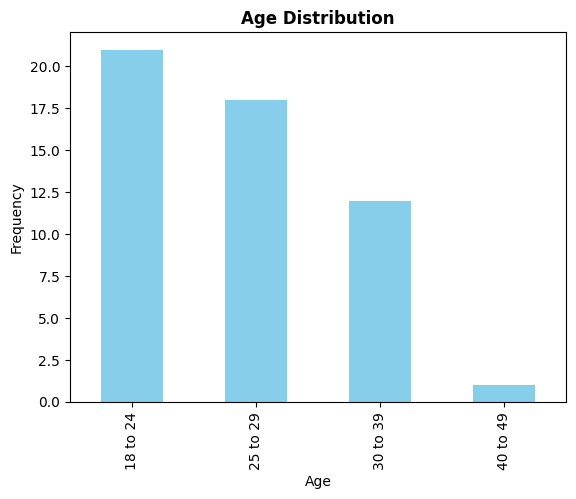

In [5]:
pd.reset_option('display.max_columns')
pd.reset_option('display.max_rows')

# Bar chart for Age Distribution
df_cleaned['Age'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Age Distribution', weight='bold')
plt.xlabel('Age')
plt.ylabel('Frequency')
# plt.savefig('Age Distribution.png', dpi=600, bbox_inches='tight')
plt.show()
plt.close()

# Age Distribution Notes: 
- Self-explanatory. 
- Only a single respondent belonged to the older age group (40-49). 
- Interestingly yet not surprisingly, nobody answering the survey was 50 years and older. 
- *"Moreover, from the perspective of age, the overall game live streaming users are still dominated by users under 34 years old, among which 16-24 years old accounts for the highest proportion 41%."* Luwei Yao, 2022

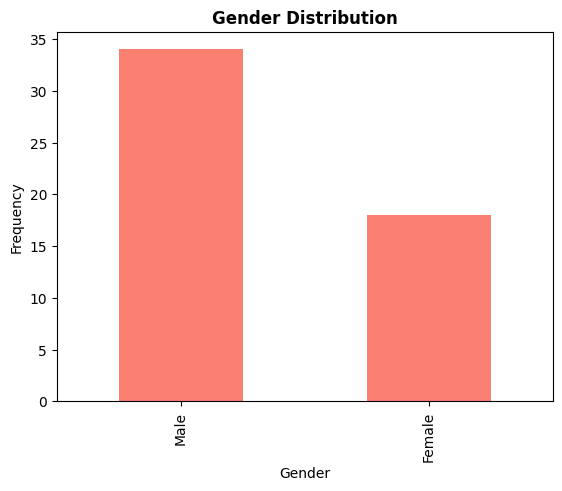

In [6]:
# Bar chart for Gender Distribution
df_cleaned['Gender'].value_counts().plot(kind='bar', color='salmon')
plt.title('Gender Distribution', weight='bold')
plt.xlabel('Gender')
plt.ylabel('Frequency')
# plt.savefig('Gender Distribution.png', dpi=600, bbox_inches='tight')
plt.show()
plt.close()

# Gender Distribution Notes
- Nothing much to note here, though it's just nice to visualize this just in case I'd eventually need it. 
- Self-explanatory.
- *"The demographics of livestreaming games are still predominantly male, which is similar to the demographics of the overall gaming audience."* - Luwei Yao, 2022

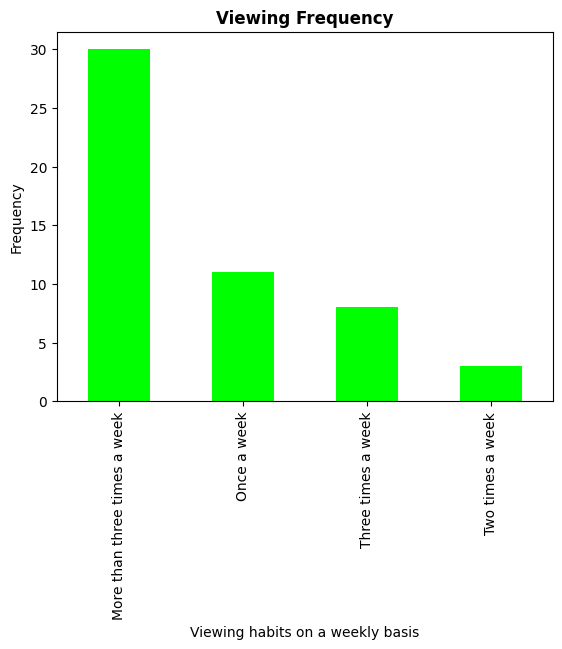

In [7]:
# Bar chart for viewing frequency
df_cleaned['On a weekly basis, how often do you watch video game live streams?']\
.value_counts().plot(kind='bar', color='lime')
plt.title('Viewing Frequency', weight='bold')
plt.xlabel('Viewing habits on a weekly basis')
plt.ylabel('Frequency')
# plt.savefig('Viewing Frequency.png', dpi=600, bbox_inches='tight')
plt.show()

# Viewing Distribution Notes: 
- It's pretty self-explanatory.
- The results are not surprising, given that people who enjoy watching live streams make it a point to watch frequently. 
- This chart is good to note as it demonstrates that most of the respondents are frequent viewers, increasing the validity of the survey's results. 

In [8]:
# Splitting livestream platforms column for more accurate analysis
df_cleaned['Platforms'] = df_cleaned['What live streaming platforms do you usually watch video game live streams on? Please check all that apply.'].str.split(', ')
df_exploded = df_cleaned.explode('Platforms')
platform_counts = df_exploded['Platforms'].value_counts()

# Display results
print(platform_counts)
# platform_counts.to_csv('Platform Counts.csv', header=True)
# print('Platform counts saved to Platform Counts.csv')

Platforms
Bola.TV            34
Facebook Gaming    31
YouTube Gaming     20
TikTok Live        19
Twitch             17
Name: count, dtype: int64


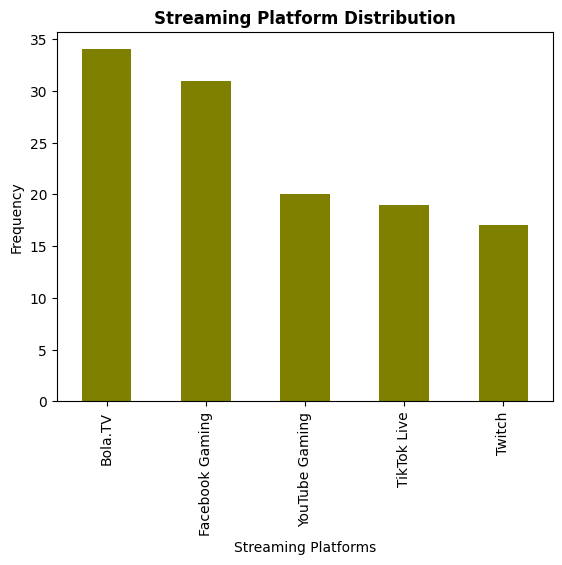

In [9]:
# Bar chart for the Streaming Platform Distribution
platform_counts.plot(kind='bar', color='olive')
plt.title('Streaming Platform Distribution', weight='bold')
plt.xlabel('Streaming Platforms')
plt.ylabel('Frequency')
# plt.savefig('Platform Distribution.png', dpi=600, bbox_inches='tight')
plt.show()
plt.close()

# Streaming Platform Distribution Notes: 
- Among the nine different options I listed in Preferred Streaming Platforms (including the 'others' option to account for those that I have potentially missed), only five were selected, namely, Bola.TV, Facebook Gaming, YouTube Gaming, TikTok Live, and Twitch. 
- Bola.TV is the most popular, followed by Facebook Gaming, YouTube Gaming, TikTok Live, and Twitch. 
- Most of the respondents who answered are esports streaming fans because that is the game genre that Bola.TV specializes in. 
- At the time of writing this, Bola.TV was unfortunately closed down, hence, going to their eponymously-named website results in an invalid link. However, by searching Bola TV on any search engine, one can see that they formerly existed. 

In [10]:
# Excluding video games from appearing as a 'Favorite Streamer' so as to not skew results
exclude_games = ['Grand Theft Auto V', 'Mobile Legends Bang Bang'] 

# Splitting Favorite Streamer column for more accurate analysis
df_cleaned['Streamers'] = df_cleaned['Who would you say is your favorite video game live streamer? You may list more than one.'].str.split(', ')
df_exploded = df_cleaned.explode('Streamers')
df_exploded = df_exploded[~df_exploded['Streamers'].isin(exclude_games)]
streamer_counts = df_exploded['Streamers'].value_counts()

# Display results
print(streamer_counts)
# streamer_counts.to_csv('Streamer Counts.csv', header=True)
# print('Streamer counts saved to Streamer Counts.csv')

Streamers
Renniyyya Gaming    5
Bombay Tv           4
OverXyze            3
PeenoisePlays       2
Ohmyv33nus          2
                   ..
RogerRakerTV        1
tapangking          1
BaristaRobss        1
JimmyHere           1
Lethamyr            1
Name: count, Length: 69, dtype: int64


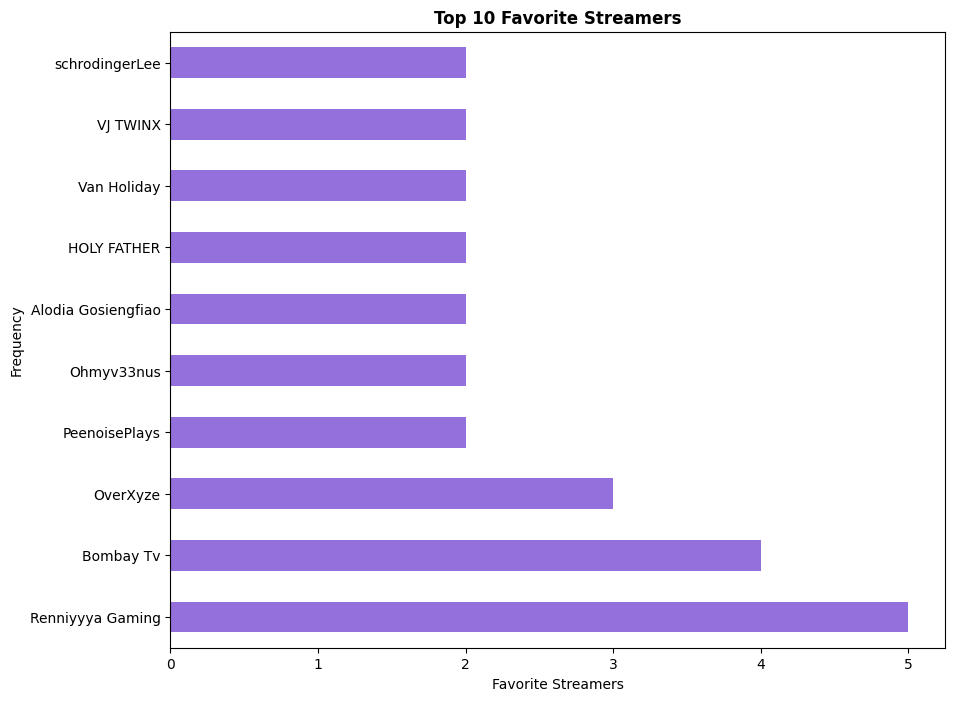

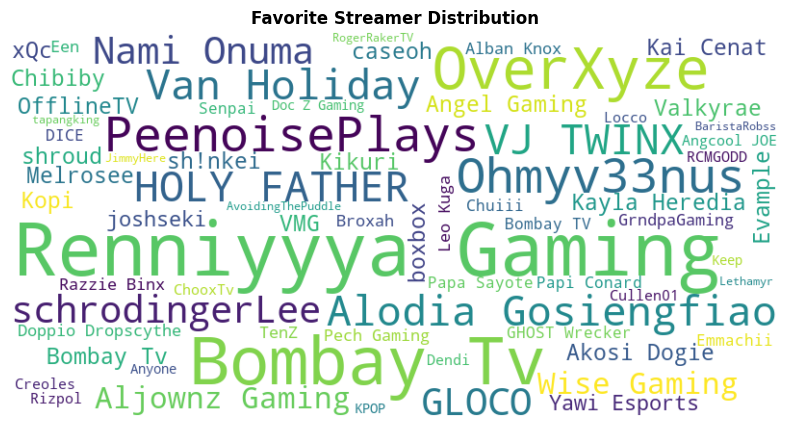

In [11]:
# Generating horizontal bar chart for the top 10 streamers
top_streamers = streamer_counts.head(10)
plt.figure(figsize=(10,8))
top_streamers.plot(kind='barh', color='mediumpurple')
plt.title('Top 10 Favorite Streamers', weight='bold')
plt.xlabel('Favorite Streamers')
plt.ylabel('Frequency')
# plt.savefig('Favorite Streamer Distribution Bar.png', dpi=600, bbox_inches='tight')
plt.show()
plt.close()

# Generating wordcloud for Favorite Streamer Distribution
wordcloud = WordCloud(width=800, height=400, background_color='white')\
.generate_from_frequencies(streamer_counts)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Favorite Streamer Distribution', weight='bold')
# plt.savefig('Favorite Streamer Distribution WordCloud.png', dpi=600, bbox_inches='tight')
plt.show()
plt.close()

# Favorite Streamer Distribution Notes: 
- The top favorite streamers are mostly Filipino. 
- Evidently, the top 3 streamers are undisputably Renniyyya Gaming, Bombay Tv, and OverXyze. 
- Determining the 4th most popular streamer onwards gets tricky (and impractical) because several streamers are tied for 4th place, same goes for 5th place. 
- Very few foreign streamers appear on the list, and none of them are in the *Top 10*. 

In [12]:
# Converting likert scale items to numerical values for statistical analysis
likert_mapping = {
    'Strongly Disagree': 1, 
    'Slightly Disagree': 2, 
    'Neither Agree nor Disagree': 3, 
    'Slightly Agree': 4, 
    'Strongly Agree': 5
} 

# The list of columns containing the Likert scale items
likert_columns = ["While watching my favorite live streamer, I had the feeling that the streamer I'm watching... [Was aware of me.]", 
                  "While watching my favorite live streamer, I had the feeling that the streamer I'm watching... [Knew I was there.]",
                  "While watching my favorite live streamer, I had the feeling that the streamer I'm watching... [Knew I was aware of them.]",
                  "While watching my favorite live streamer, I had the feeling that the streamer I'm watching... [Knew I paid attention to them.]", 
                  "While watching my favorite live streamer, I had the feeling that the streamer I'm watching... [Knew that I reacted to them.]",
                  "While watching my favorite live streamer, I had the feeling that the streamer I'm watching... [Reacted to what I said or did.]",
                  "[My favorite streamer makes me feel comfortable, as if I am with a friend.]",
                  "[I see my favorite streamer as a natural, down-to-earth person.]",
                  "[I look forward to watching my favorite streamer the next time they stream.]",
                  "[If my favorite live streamer appeared on another streamer's live stream, I would also watch that live stream.]",
                  "[My favorite streamer seems to understand the kind of things I want to know.]",
                  "[If I saw a story or article about my favorite streamer online, I would read it.]",
                  "[I miss seeing my favorite streamer when he or she is ill or on a vacation.]",
                  "[I would like to meet my favorite streamer in person.]",
                  "[I feel sorry for my favorite streamer when he or she makes a mistake.]",
                  "[I'd like to do the things my favorite streamer does while streaming.]",
                  "[My favorite streamer is the sort of person I want to be like myself.]",
                  "[I wish I could be more like my favorite streamer.]", 
                  "[Whenever I have time, I log on to my live stream platform account.]",
                  "[Frequently, I regret I consume too much time watching live streams.]",
                  "[If I could not watch live streams, I would be depressed.]",
                  "[I have difficulties in focusing on my study or work due to watching live streams.]",
                  "[I lose sleep over spending more time watching live streams.]",
                  "[Watching live streams interferes with doing social activities.]",
                  "[I feel anxious if I cannot watch live streams.]",
                  "[I have attempted to spend less time watching live streams but have not succeeded.]",
                  "[I get important needs of mine met because I am a part of my favorite streamer's fanbase.]",
                  "[My favorite streamer's fanbase and I value the same things.]",
                  "[Being a member of my favorite streamer's fanbase makes me feel good.]",
                  "[When I have a problem, I can talk about it with members of my favorite streamer's fanbase.]",
                  "[People in the fanbase have similar needs, priorities, and goals.]",
                  "[I can trust people in this community.]",
                  "[I put a lot of time and effort into being part of my favorite streamer's fanbase.]",
                  "[Being a member of my favorite streamer's fanbase is a part of my identity.]",
                  "[Fitting into my favorite streamer's fanbase is important to me.]",
                  "[It is very important for me to be a part of my favorite streamer's fanbase.]",
                  "[I expect to be a part of my favorite streamer's fanbase for a long time.]",
                  "[I feel in tune with my favorite streamer's fanbase while watching my favorite streamer.]",
                  "[I do not feel alone while watching my favorite streamer.]",
                  "[I feel part of a group of friends while watching my favorite streamer.]",
                  "[My interests and ideas are not shared by those in my favorite streamer's fanbase.]",
                  "[There are people in my favorite streamer's fanbase I feel close to.]",
                  "[I feel left out while watching my favorite streamer.]",
                  "[I feel isolated from others in my favorite streamer's fanbase.]",
                  "[I am unhappy being so withdrawn from others in my favorite streamer's fanbase.]",
                  "[Attractive]",
                  "[Classy]",
                  "[Handsome/Beautiful]",
                  "[Sexy]",
                  "[Dependable]",
                  "[Honest]",
                  "[Reliable]",
                  "[Sincere]",
                  "[Trustworthy]",
                  "[Expert]",
                  "[Experienced]",
                  "[Knowledgeable]",
                  "[Skilled]"
                  
]

# Applying the mapping to the Likert columns
df_cleaned[likert_columns] = df_cleaned[likert_columns].applymap(likert_mapping.get)

# Testing to see if it works
df_cleaned.head()

# Saving the revised thesis csv file 
# df_cleaned.to_csv('Cleaned and Converted Thesis.csv', header=True)
# print('Cleaned and Converted thesis saved!')

C:\Users\HP\AppData\Local\Temp\ipykernel_10668\2484320908.py:73: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_cleaned[likert_columns] = df_cleaned[likert_columns].applymap(likert_mapping.get)


,Timestamp,Gender,Age,"On a weekly basis, how often do you watch video game live streams?",What live streaming platforms do you usually watch video game live streams on? Please check all that apply.,Who would you say is your favorite video game live streamer? You may list more than one.,"While watching my favorite live streamer, I had the feeling that the streamer I'm watching... [Was aware of me.]","While watching my favorite live streamer, I had the feeling that the streamer I'm watching... [Knew I was there.]","While watching my favorite live streamer, I had the feeling that the streamer I'm watching... [Knew I was aware of them.]","While watching my favorite live streamer, I had the feeling that the streamer I'm watching... [Knew I paid attention to them.]",...,[Honest],[Reliable],[Sincere],[Trustworthy],[Expert],[Experienced],[Knowledgeable],[Skilled],Platforms,Streamers
0,3/6/2024 19:41,Male,25 to 29,More than three times a week,"Twitch, YouTube Gaming, Bola.TV",GrndpaGaming,3,3,2,3,...,5,4,5,5,4,5,3,5,"[Twitch, YouTube Gaming, Bola.TV]",[GrndpaGaming]
1,3/6/2024 19:42,Male,25 to 29,More than three times a week,"YouTube Gaming, Facebook Gaming, TikTok Live, ...",OverXyze,5,5,5,5,...,4,4,4,4,4,4,4,4,"[YouTube Gaming, Facebook Gaming, TikTok Live,...",[OverXyze]
2,3/6/2024 19:50,Male,30 to 39,More than three times a week,"Facebook Gaming, Bola.TV",Mobile Legends Bang Bang,4,4,4,5,...,5,5,5,5,5,5,5,5,"[Facebook Gaming, Bola.TV]",[Mobile Legends Bang Bang]
3,3/6/2024 20:05,Male,18 to 24,More than three times a week,"Twitch, YouTube Gaming, Facebook Gaming, TikTo...","Papi Conard, DICE, Aljownz Gaming, Senpai",5,5,5,5,...,5,5,5,5,5,5,5,5,"[Twitch, YouTube Gaming, Facebook Gaming, TikT...","[Papi Conard, DICE, Aljownz Gaming, Senpai]"
4,3/6/2024 20:09,Male,30 to 39,More than three times a week,"Facebook Gaming, Bola.TV",Bombay Tv,5,5,5,5,...,5,5,5,5,4,4,5,5,"[Facebook Gaming, Bola.TV]",[Bombay Tv]


In [13]:
# Reverse scoring some items where it's necessary 
reverse_items = ["[I feel in tune with my favorite streamer's fanbase while watching my favorite streamer.]",
                 "[I do not feel alone while watching my favorite streamer.]",
                 "[I feel part of a group of friends while watching my favorite streamer.]", 
                 "[There are people in my favorite streamer's fanbase I feel close to.]"]
max_score = 5

for item in reverse_items:
    df_cleaned[f'{item}_reversed'] = max_score + 1 - df_cleaned[item]

# df_cleaned.to_csv('Cleaned, Converted, and Reversed Thesis.csv', header=True)
df_cleaned = pd.read_csv('Cleaned, Converted, and Reversed Thesis.csv')
print(df_cleaned.head())

   Unnamed: 0       Timestamp Gender       Age  \
0           0  3/6/2024 19:41   Male  25 to 29   
1           1  3/6/2024 19:42   Male  25 to 29   
2           2  3/6/2024 19:50   Male  30 to 39   
3           3  3/6/2024 20:05   Male  18 to 24   
4           4  3/6/2024 20:09   Male  30 to 39   

  On a weekly basis, how often do you watch video game live streams?  \
0                       More than three times a week                   
1                       More than three times a week                   
2                       More than three times a week                   
3                       More than three times a week                   
4                       More than three times a week                   

  What live streaming platforms do you usually watch video game live streams on? Please check all that apply.  \
0                    Twitch, YouTube Gaming, Bola.TV                                                            
1  YouTube Gaming, Facebook Gaming, TikT

In [14]:
# Calculating Measures of Central Tendency
def calculate_mode(series): 
    return series.mode().iloc[0] if not series.mode().empty else None

central_tendency = df_cleaned[likert_columns].agg(['mean', 'median', calculate_mode])
central_tendency.rename(index={'calculate_mode': 'mode'}, inplace=True)

central_tendency.head()
# central_tendency.to_csv('Central Tendency.csv', header=True)

,"While watching my favorite live streamer, I had the feeling that the streamer I'm watching... [Was aware of me.]","While watching my favorite live streamer, I had the feeling that the streamer I'm watching... [Knew I was there.]","While watching my favorite live streamer, I had the feeling that the streamer I'm watching... [Knew I was aware of them.]","While watching my favorite live streamer, I had the feeling that the streamer I'm watching... [Knew I paid attention to them.]","While watching my favorite live streamer, I had the feeling that the streamer I'm watching... [Knew that I reacted to them.]","While watching my favorite live streamer, I had the feeling that the streamer I'm watching... [Reacted to what I said or did.]","[My favorite streamer makes me feel comfortable, as if I am with a friend.]","[I see my favorite streamer as a natural, down-to-earth person.]",[I look forward to watching my favorite streamer the next time they stream.],"[If my favorite live streamer appeared on another streamer's live stream, I would also watch that live stream.]",...,[Sexy],[Dependable],[Honest],[Reliable],[Sincere],[Trustworthy],[Expert],[Experienced],[Knowledgeable],[Skilled]
mean,3.826923,3.692308,3.865385,3.807692,3.923077,3.865385,4.25,4.384615,4.211538,4.269231,...,3.807692,4.307692,4.538462,4.403846,4.365385,4.346154,4.480769,4.538462,4.519231,4.557692
median,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.00,5.000000,5.000000,5.000000,...,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mode,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


# Measures of Central Tendency (Mean, Median, and Mode Notes) 
- The mean correlates with what can be seen in the Numerical Summary. 
- In short, video game live stream viewers view the PSRs and PSIs that they share with their favorite video game streamer to be positive, hence, they inclined to react positively to these statements. The same can be said for the Celebrity Credibility scale. 
- On the other hand, the respondents generally disagreed with the Addiction and Loneliness scales, showing that most respondents do not view their frequent live stream watching to be detrimental to themselves.
- The results of the median and the mode both confirm the findings that can be seen in the mean. 
- Interestingly, the Sense of Community scale seems to have a 'mixed bag' in terms of findings. 
- The mean, median, and mode for a lot of the items in the scale are in the middle of all the other scales, not being as 'high' as PSI and PSR, but not as 'low' as addiction and loneliness. 
- This implies that most of the respondents viewed these statements 'neutrally' (no strong agreement or disagreement). 
- Only four out of the eleven statements in the scale have a mode of 5: 
    1. Being a member of my favorite streamer's fanbase makes me feel good.
    2. I put a lot of time and effort into being part of my favorite streamer's fanbase
    3. Fitting into my favorite streamer's fanbase is important to me.
    4. I expect to be a part of my favorite streamer's fanbase for a long time. 
- I interpret this as demonstrating that though the respondents generally view a streamer's fanbase as something that is beneficial to them and is worth putting in the time and effort, they also acknowledge that their involvement in the fanbase is not as important, as say, their involvement with the streamer themselves.
- Ultimately, most respondents may agree that they do not tend to view the fanbase as an important source for enhancing their enjoyment of the streamer, nor do they see it as an avenue that helps get their important self- needs met.  
- This is supported by a relatively neutral mean, median, and mode score when it comes to statements measuring their level of trust with other fanbase members, or how important they feel the fanbase is with forming their self-identity, among others. 


In [15]:
# Calculating Measures of Dispersion

range_ = df_cleaned[likert_columns].max() - df_cleaned[likert_columns].min()
variance = df_cleaned[likert_columns].var()
std_dev = df_cleaned[likert_columns].std()
iqr = df_cleaned[likert_columns].quantile(0.75) - df_cleaned[likert_columns].quantile(0.25)

dispersion = pd.DataFrame({
    'Range': range_, 
    'Variance': variance, 
    'Standard Deviation': std_dev, 
    'IQR': iqr
})

dispersion.head()
# dispersion.to_csv('Dispersion.csv', header=True)

,Range,Variance,Standard Deviation,IQR
"While watching my favorite live streamer, I had the feeling that the streamer I'm watching... [Was aware of me.]",4,1.714555,1.309410,2.0
"While watching my favorite live streamer, I had the feeling that the streamer I'm watching... [Knew I was there.]",4,1.825038,1.350940,2.0
"While watching my favorite live streamer, I had the feeling that the streamer I'm watching... [Knew I was aware of them.]",4,1.765837,1.328848,2.0
"While watching my favorite live streamer, I had the feeling that the streamer I'm watching... [Knew I paid attention to them.]",4,1.844646,1.358177,2.0
"While watching my favorite live streamer, I had the feeling that the streamer I'm watching... [Knew that I reacted to them.]",4,1.680241,1.296241,2.0


# Measures of Dispersion Notes 
- Almost all items have a range of 4, equal to the maximum range of a typical five-point Likert scale. 
- This demonstrates that in most items, respondents tended to express different opinions for the statement.
- Only item with a range of 3 is '*I feel part of a group of friends while watching my favorite streamer*'.
- The item also achieved a higher than average mean, median, and mode, showing that the answers of most respondents tend to be in agreement about how attending live streams make viewers feel as if they are part of a group of friends.
- Items also had varying standard deviation, though most (31 out of 58) had standard deviations higher than 1.2
- This indicates that most items in the survey generally enjoyed a wider dispersion of results, hence, respondents had a more varied consensus on whether or not they agreed with the statement. 
- Interestingly, the standard deviation between items belonging to the same scale tended to be similar, with the exception of some outliers. 
- Negative attitude measuring scales like the Addiction scale and the Loneliness scale tended to exhibit high standard deviation scores. 
- This shows that there is a particularly wide variation of responses with these scales, indicating that though the majority of respondents disagree with these statements as shown by these items' Mean, Median, and Mode, there is evidence of a minority that do agree with these statements. 
- IQR mirrors the observations of the other findings.
- Only items with a noticeably high IQR, thereby demonstrating a wide spread in the middle 50% of the data, are items found in the more 'controversial' scales such as the Addiction scale and the Loneliness scale. 
- This observation supports the high standard deviation scores that these items also tended to exhibit as discussed earlier. 

# Violin Plots Note
- Violin plots confirm the findings of the Measures of Dispersion, specifically Standard Deviation and IQR. 
- Items with a narrower Standard Deviation and IQR tend to have sharper violins due to the responses mostly being concentrated in one area. 
- On the other hand, items with a wider Standard Deviation and IQR, like some of the items in the Addiction and Loneliness scales, have plumper violins, to the point that some of them resemble lips more than violins. 

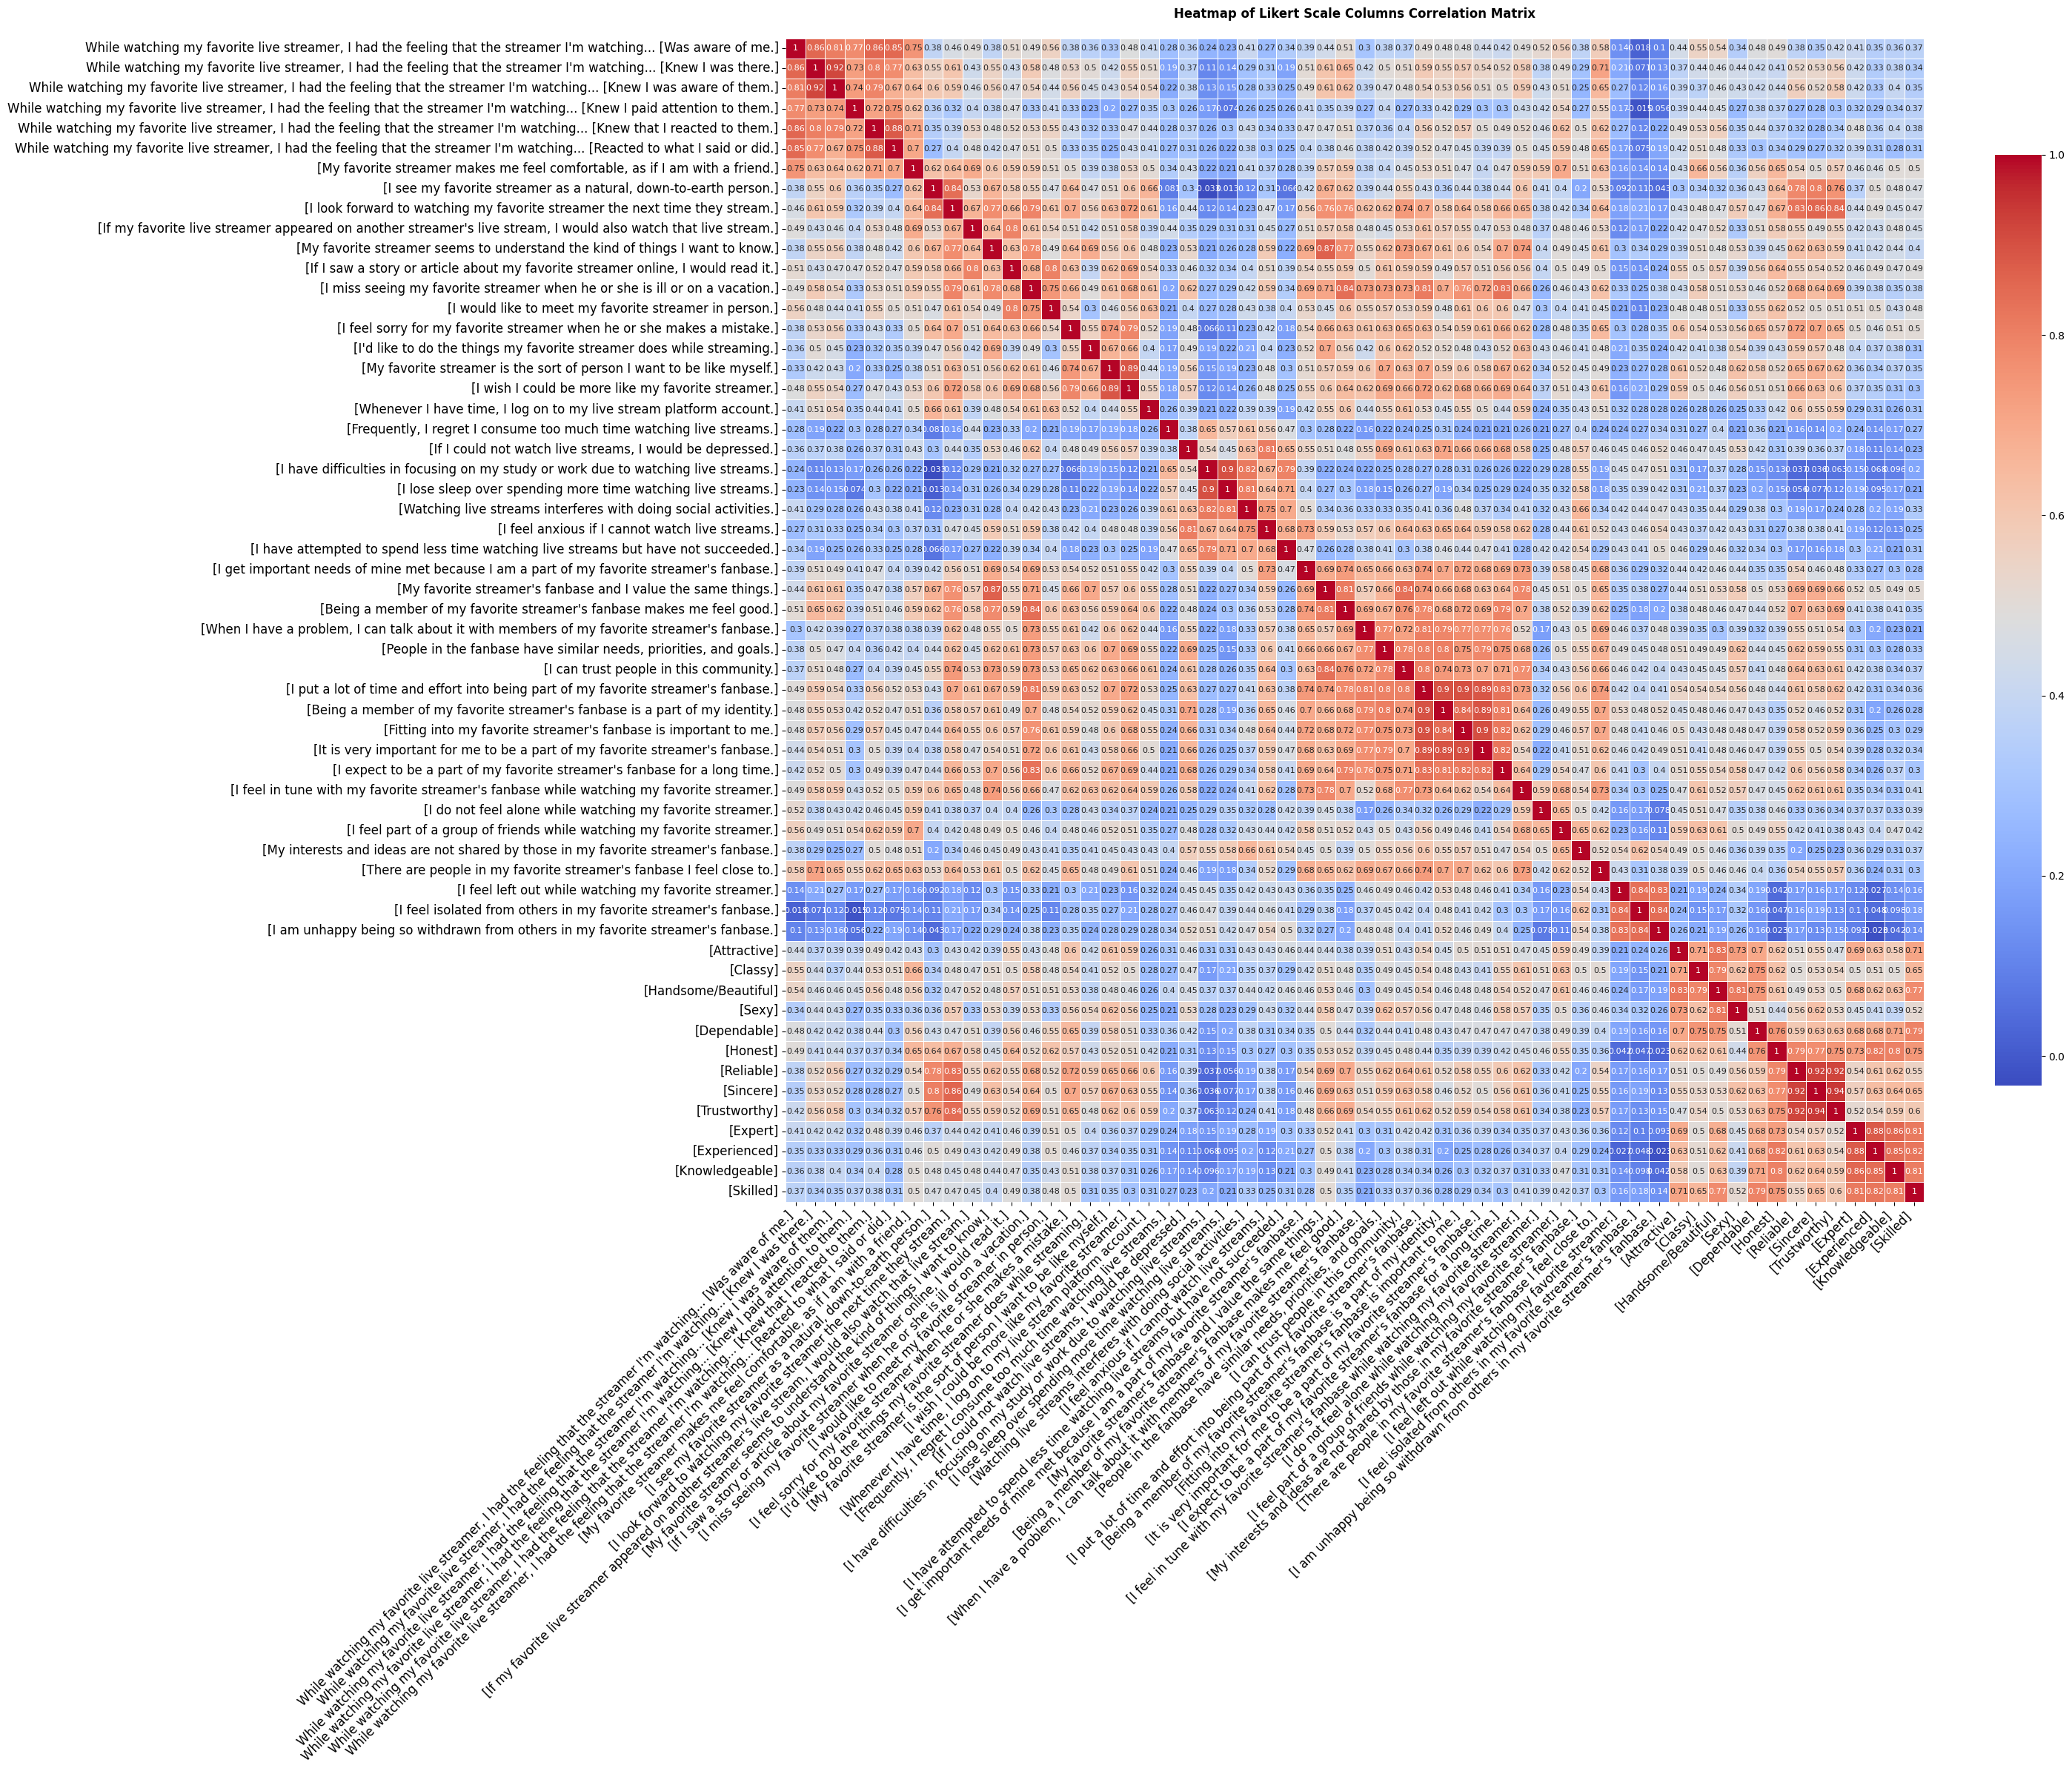

In [16]:
# Creating a heatmap

correlation_matrix = df_cleaned[likert_columns].corr()

plt.figure(figsize=(30, 24))
heatmap = sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            linewidths=.5, 
            cbar_kws={"shrink": .8}, 
            annot_kws={"size": 8})
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=12)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, fontsize=12)
plt.title('Heatmap of Likert Scale Columns Correlation Matrix', pad=20, weight='bold')
plt.tight_layout()
# plt.savefig('Heatmap.png', dpi=600, bbox_inches='tight')
plt.show()

# Heatmap Notes
- There are three parts of the heatmap where one can see strong positive correlation between survey items. 
- On the other hand, there are also parts of the heatmap where one can see strong negative correlation between survey items, though this is noticeably more dispersed than the areas with strong positive correlation. 

## A. Clusters with Strong Positive Correlation
1. There is a strong correlation cluster noticeable on the top left corner of the heatmap. Upon closer observation, these items belong to the same scale, specifically the PSI scale. This may indicate that live stream viewers who agree with a particular PSI statement will also agree with the other statements belonging to the same scale.  
2. Another cluster where a strong positive correlation can be observed is a tiny 9-square one on the upper right of the square. These items come from the Addiction Scale. This may indicate that viewers who agree with one statement measuring addiction, such as being unable to focus on school or work, are also likely to agree with other addiction-measuring statements.  
3. Another cluster can also be observed in the middle. These items all belong to the Sense of Community scale. This may indicate that live stream viewers who feel positively about a particular fanbase statement, such as fitting in, will also feel agree with other statements in the sense of community scale. 
4. Although smaller, there is also a tiny 2x2 cluster above the Addiction Scale cluster as mentioned in number 2. These items belong to the Wishful Identification scale. This may indicate that live stream viewers who look up to their favorite streamer as someone they want to be in the future will also strongly agree with the other items in the scale. 
5. The last notable cluster I've observed for strong positive correlation is at the bottom right of the heatmap. All the items in the cluster belong to the 'Celebrity Credibility' scale, especially regarding the 'Reliable', 'Sincere', and 'Trustworthy' items. This may indicate that viewers who agree that their favorite streamers possess any one of these qualities are also likely to agree with the other two. 

## B. Clusters with Strong Negative Correlation
- Interestingly, though there are several strong negative correlations, the clusters are much smaller. 
- Clusters of note include: 
    1. There is a 2x2 cluster with 2 items from the 'Addiction Scale' (difficulty focusing and lack of sleep) and2 items from the 'PSR' scale (streamer is down-to-earth, eager to see streamer again). This may indicate that viewers who experience lack of sleep or are unable to get important tasks done may not view their favorite streamer as a down-to-earth person, nor are eager to watch their next live stream.
    2. There is another 2x2 cluster involving 2 items from the PSI Scale ('Was aware of me', 'Knew I was there) and 2 items from the 'Loneliness' scale (feeling isolated, unhappy from being withdrawn). This may indicate that viewers who felt as if their favorite streamer acknowledged their presence tended not to feel isolated by others also viewing the live stream, nor were they likely to feel unhappy being withdrawn within the streamer's fanbase.
    3. Just a little below number 2 is another 2x2 cluster involving the same 2 'Loneliness' scale ('I feel isolated, unhappy being so withdrawn) items, but 2 different items from the PSI Scale (streamer paid attention to them, streamer knew that they reacted to them). This may indicate that viewers who felt that their favorite streamers were giving them ample attention and appropriately reacting to their interactions were less likely to feel withdrawn or isolated within a streamer's fanbase. 

## C. Cells with Strong Positive Correlation
- Not all strong positive and negative correlations could be exclusively found grouped in clusters.
- There are lone items within the heatmap that I have noticed are exceptionally hot (strong positive) or cold (strong negative), indicating that there are lone items that may possess strong correlations with each other. 
- Therefore, the focus for both this section and succeeding ones is the proper identification of these lone cells that either have strong positive correlations or strong negative correlations. 
    1. A three-cell strong positive correlation can be observed in the upper right corner of the square. Ultimately, the items involved is one item from the PSR scale (looking forward to watching my favorite streamer again) and three items from the 'Celebrity Credibility' scale (Reliable, Sincere, Trustworthy). This may indicate that if viewers see their favorite streamer as being reliable, sincere, and trustworthy, they're also more likely to look forward to watching their favorite streamer again.
    2. A one-cell strong positive correlation can be observed between one PSR item (favorite streamer seems to understand what the viewer wants) and one 'Sense of Community' item (fanbase and viewer value the same things). This may indicate that if a viewer and their fanbase value the same things, then the streamer is more likely to understand the viewer's wants and needs. 

## D. Cells with Strong Negative Correlation
1. There is a strong negative correlation between one PSR item ('I feel sorry for my favorite streamer when they make a mistake') with 2 items from the 'Addiction scale' (difficulty focusing, lack of sleep). This may indicate that there if viewers feel that watching live streams robs them of valuable sleep or makes it difficult for them to prioritize doing what's important, then they are less sympathetic to their favorite streamers when they make a mistake. 
2. There is a single-cell strong negative correlation between two 'Loneliness Scale' items ('I do not feel alone...') and ('I am unhappy being so withdrawn from others in my favorite streamer's fanbase'). This may indicate that viewers who feel withdrawn from others while watching live streams also tend to feel lonely while watching these live streams. 
3. There is a single-cell strong negative correlation between one PSR item (streamer feels natural, down-to-earth) and one 'Loneliness' item (feeling withdrawn from others). This may indicate that streamers who appear natural or down-to-earth help their viewers feel less withdrawn from others also watching. 
4. There is a three-cell strong negative correlation between one 'Celebrity Credibility' item (Honest) and three 'Loneliness' scale items (feeling left out, isolated, withdrawn from others in the live stream). This may indicate that streamers who are perceived to be honest help their viewers feel less left out, isolated, or withdrawn from other viewers while streaming. 
5. There is a three-cell strong negative correlation between one 'Celebrity Credibility' item (Experienced) and three 'Loneliness' scale items (feeling left out, isolated, withdrawn from others in the live stream). This may indicate that streamers who are perceived to be experienced help their viewers feel less left out, isolated, or withdrawn from other viewers while streaming. 

# List of the hypotheses I'm testing for reference: 

1. Video game live streamers experience negative and unsatisfying parasocial relationships with their favorite streamers.
   - Null: Video game live stream viewers experience positive and satisfying parasocial relationships with their favorite streamers. 
2. Video game live stream viewers believe that their favorite streamers are unaware of and ignore their presence and interactions.
    - Null: Video game live stream viewers believe that their favorite streamers are aware of and acknowledge their presence and interactions. 
3. Video game live stream viewers do not look up to their favorite streamers, nor do they aspire to be like them or do the things that they do. 
    - Null: Video game live stream viewers look up to their favorite streamers and aspire to be like them or do the things that they do. 
4.	Video game live stream viewers feel that watching their favorite streamers regularly can increase feelings of loneliness.
    - Null: Video game live stream viewers feel that watching their favorite streamers regularly does not increase feelings of loneliness.  
5. Video game live stream viewers feel that watching their favorite live streamers regularly can induce live stream addiction.
    - Null: Video game live stream viewers feel that watching their favorite streamers regularly does not induce live stream addiction. 
6.	Video game live stream viewers think that that their favorite streamer’s fanbase is inessential to helping them enjoy their favorite streamer’s streams more. 
    - Null: Video game live stream viewers think that their favorite streamer’s fanbase is essential to helping them enjoy their favorite streamer’s streams more. 
7.	Video game live stream viewers do not consider their favorite streamers credible due to the streamer’s unattractiveness, dishonesty, or lack of skill.
    - Null: Video game live stream viewers consider their favorite streamers credible due to their attractiveness, trustworthiness, or skill. 

In [17]:
# Defining the columns for each scale. 

Hypothesis1_cols = ["[My favorite streamer makes me feel comfortable, as if I am with a friend.]", 
                    "[I see my favorite streamer as a natural, down-to-earth person.]",
                    "[I look forward to watching my favorite streamer the next time they stream.]",
                    "[If my favorite live streamer appeared on another streamer's live stream, I would also watch that live stream.]",
                    "[My favorite streamer seems to understand the kind of things I want to know.]", 
                    "[If I saw a story or article about my favorite streamer online, I would read it.]", 
                    "[I miss seeing my favorite streamer when he or she is ill or on a vacation.]",
                    "[I would like to meet my favorite streamer in person.]", 
                    "[I feel sorry for my favorite streamer when he or she makes a mistake.]"]

Hypothesis2_cols = ["While watching my favorite live streamer, I had the feeling that the streamer I'm watching... [Was aware of me.]",
                    "While watching my favorite live streamer, I had the feeling that the streamer I'm watching... [Knew I was there.]", 
                    "While watching my favorite live streamer, I had the feeling that the streamer I'm watching... [Knew I was aware of them.]", 
                    "While watching my favorite live streamer, I had the feeling that the streamer I'm watching... [Knew I paid attention to them.]", 
                    "While watching my favorite live streamer, I had the feeling that the streamer I'm watching... [Knew that I reacted to them.]", 
                    "While watching my favorite live streamer, I had the feeling that the streamer I'm watching... [Reacted to what I said or did.]"]

Hypothesis3_cols = ["[I'd like to do the things my favorite streamer does while streaming.]", 
                    "[My favorite streamer is the sort of person I want to be like myself.]", 
                    "[I wish I could be more like my favorite streamer.]"]

Hypothesis4_cols_reversed = ["[I feel in tune with my favorite streamer's fanbase while watching my favorite streamer.]_reversed",
                    "[I do not feel alone while watching my favorite streamer.]_reversed",
                    "[I feel part of a group of friends while watching my favorite streamer.]_reversed", 
                    "[My interests and ideas are not shared by those in my favorite streamer's fanbase.]",
                    "[There are people in my favorite streamer's fanbase I feel close to.]_reversed", 
                    "[I feel left out while watching my favorite streamer.]", 
                    "[I feel isolated from others in my favorite streamer's fanbase.]",
                    "[I am unhappy being so withdrawn from others in my favorite streamer's fanbase.]"]

Hypothesis4_cols = ["[I feel in tune with my favorite streamer's fanbase while watching my favorite streamer.]",
                    "[I do not feel alone while watching my favorite streamer.]",
                    "[I feel part of a group of friends while watching my favorite streamer.]", 
                    "[My interests and ideas are not shared by those in my favorite streamer's fanbase.]",
                    "[There are people in my favorite streamer's fanbase I feel close to.]", 
                    "[I feel left out while watching my favorite streamer.]", 
                    "[I feel isolated from others in my favorite streamer's fanbase.]",
                    "[I am unhappy being so withdrawn from others in my favorite streamer's fanbase.]"]
                    
Hypothesis5_cols = ["[Whenever I have time, I log on to my live stream platform account.]",
                    "[Frequently, I regret I consume too much time watching live streams.]", 
                    "[If I could not watch live streams, I would be depressed.]", 
                    "[I have difficulties in focusing on my study or work due to watching live streams.]", 
                    "[I lose sleep over spending more time watching live streams.]", 
                    "[Watching live streams interferes with doing social activities.]", 
                    "[I feel anxious if I cannot watch live streams.]", 
                    "[I have attempted to spend less time watching live streams but have not succeeded.]"]


Hypothesis6_cols = ["[I get important needs of mine met because I am a part of my favorite streamer's fanbase.]",
                    "[My favorite streamer's fanbase and I value the same things.]", 
                    "[Being a member of my favorite streamer's fanbase makes me feel good.]", 
                    "[When I have a problem, I can talk about it with members of my favorite streamer's fanbase.]", 
                    "[People in the fanbase have similar needs, priorities, and goals.]", 
                    "[I can trust people in this community.]",
                    "[I put a lot of time and effort into being part of my favorite streamer's fanbase.]",
                    "[Being a member of my favorite streamer's fanbase is a part of my identity.]",
                    "[Fitting into my favorite streamer's fanbase is important to me.]", 
                    "[It is very important for me to be a part of my favorite streamer's fanbase.]",
                    "[I expect to be a part of my favorite streamer's fanbase for a long time.]"]

Hypothesis7_cols = ["[Attractive]", "[Classy]", "[Handsome/Beautiful]", "[Sexy]", "[Dependable]", "[Honest]", 
                    "[Reliable]", "[Sincere]", "[Trustworthy]", "[Expert]", "[Experienced]", "[Knowledgeable]",
                    "[Skilled]"]
                    


In [32]:
# Running a clean command on each hypothesis to ensure that no invalid or blank data compromises the results. 

items_scores_psr = df_cleaned[Hypothesis1_cols].dropna()
items_scores_psi = df_cleaned[Hypothesis2_cols].dropna()
items_scores_identification = df_cleaned[Hypothesis3_cols].dropna()
items_scores_loneliness = df_cleaned[Hypothesis4_cols].dropna()
items_scores_addiction = df_cleaned[Hypothesis5_cols].dropna()
items_scores_community = df_cleaned[Hypothesis6_cols].dropna()
items_scores_credibility = df_cleaned[Hypothesis7_cols].dropna()

# Obtaining the aggregated mean of each hypothesis for further analysis: 
df_cleaned['PSR'] = df_cleaned[Hypothesis1_cols].mean(axis=1)
df_cleaned['PSI'] = df_cleaned[Hypothesis2_cols].mean(axis=1)
df_cleaned['Wishful Identification'] = df_cleaned[Hypothesis3_cols].mean(axis=1)
df_cleaned['Loneliness'] = df_cleaned[Hypothesis4_cols].mean(axis=1)
df_cleaned['Addiction'] = df_cleaned[Hypothesis5_cols].mean(axis=1)
df_cleaned['Sense of Community'] = df_cleaned[Hypothesis6_cols].mean(axis=1)
df_cleaned['Celebrity Credibility'] = df_cleaned[Hypothesis7_cols].mean(axis=1)

# Computing the Cronbach's Alpha for each hypotheses, to determine whether the items used in the survey
# are consistent and reliable. 

# Hypothesis 1: PSR
psr_alpha = pg.cronbach_alpha(items_scores_psr)
print(f'Cronbach\'s Alpha for PSR: {psr_alpha[0]}')

# Hypothesis 2: PSI
psi_alpha = pg.cronbach_alpha(items_scores_psi)
print(f'Cronbach\'s Alpha for PSI: {psi_alpha[0]}')

# Hypothesis 3: Wishful Identification
identification_alpha = pg.cronbach_alpha(items_scores_identification)
print(f'Cronbach\'s Alpha for Wishful Identification: {identification_alpha[0]}')

# Hypothesis 4: Loneliness
loneliness_alpha = pg.cronbach_alpha(items_scores_loneliness)
print(f'Cronbach\'s Alpha for Loneliness: {loneliness_alpha[0]}')

# Hypothesis 5: Live Stream Addiction
addiction_alpha = pg.cronbach_alpha(items_scores_addiction)
print(f'Cronbach\'s Alpha for Addiction: {addiction_alpha[0]}')

# Hypothesis 6: Sense of Community
community_alpha = pg.cronbach_alpha(items_scores_community)
print(f'Cronbach\'s Alpha for Sense of Community: {community_alpha[0]}')

# Hypothesis 7: Celebrity Credibility
credibility_alpha = pg.cronbach_alpha(items_scores_credibility)
print(f'Cronbach\'s Alpha for Celebrity Credibility: {credibility_alpha[0]}')

Cronbach's Alpha for PSR: 0.939093979270991
Cronbach's Alpha for PSI: 0.9584713046103854
Cronbach's Alpha for Wishful Identification: 0.8953227124183007
Cronbach's Alpha for Loneliness: 0.8703119210307794
Cronbach's Alpha for Addiction: 0.9153848583430719
Cronbach's Alpha for Sense of Community: 0.9700485910604523
Cronbach's Alpha for Celebrity Credibility: 0.9559572105323969


# Cronbach's Alpha Interpretation
- Cronbach's Alpha is a measure typically used to gauge the consistency or reliability of a set of items belonging to a single scale.
- Thus, it's typically used by researchers when constructing a scale or conducting a survey, as it's capable of determining how effective items in a scale are when it comes to measuring a single construct. 
- For Cronbach's Alpha, a score between 0.8 to 0.9 typically indicates good general consistency, while a score of 0.9 and higher typically indicates excellent general consistency. 
- As can be seen above, the Cronbach's Alpha for all scale items are reliable. The '**PSR**', '**PSI**', '**Sense of Community**', and '**Celebrity Credibility**' scales all return excellent reliability scores, while the 'Wishful Identification' and 'Loneliness' scales return good reliability scores. 
- High Cronbach's Alpha values may suggest that the scales used within this study are both reliable and internally consistent, which means that the responses to each of the items in the scales can also be described as consistent. 
- Additionally, this also means any hypothesis testing done will be valid, because each item in the survey are able to cohesively measure their respective constructs. 

Text(0.5, 1.0, 'Q-Q Plot Celebrity Credibility')

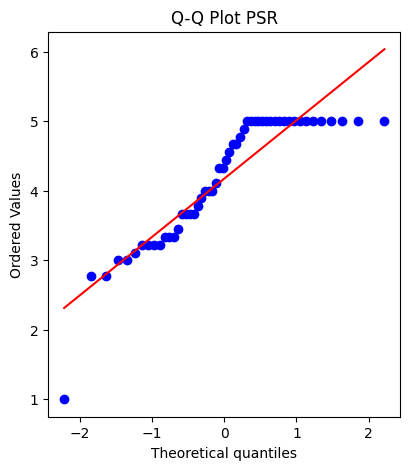

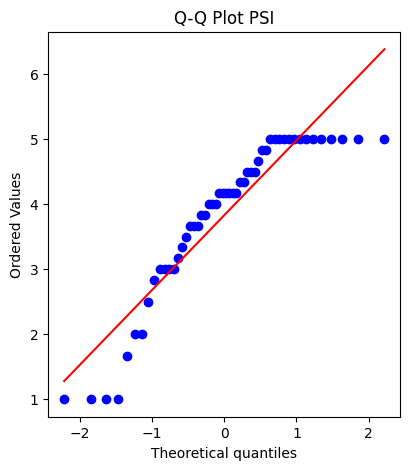

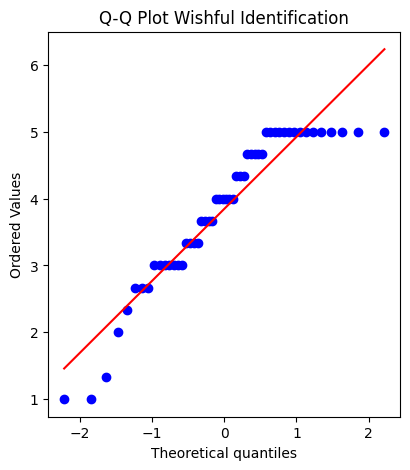

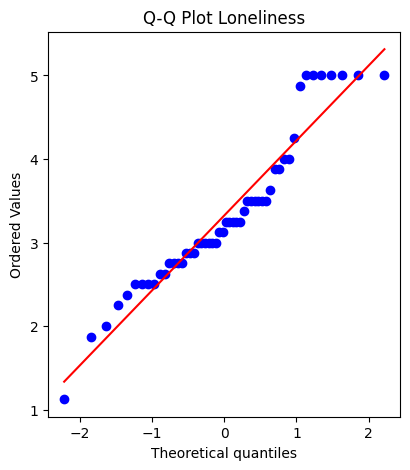

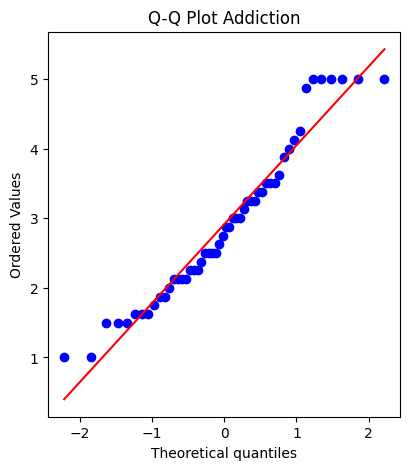

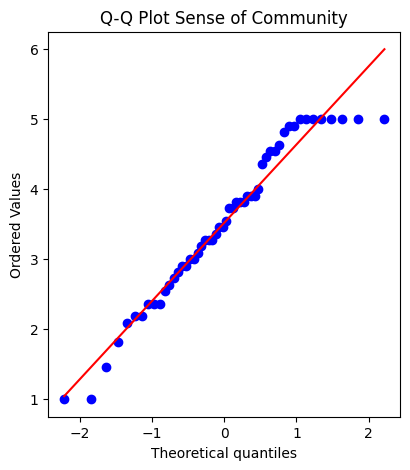

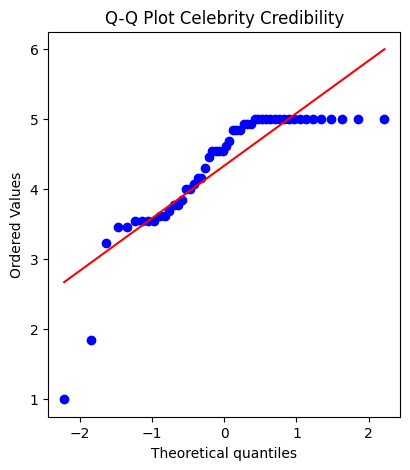

In [34]:
# Q-Q Plot to determine the kind of distribution followed by the data 

# Hypothesis 1: PSR 
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
stats.probplot(df_cleaned['PSR'].dropna(), dist="norm", plot=plt)
plt.title('Q-Q Plot PSR')
# plt.savefig('Q-Q Plot PSR.png', dpi=600, bbox_inches='tight')

# Hypothesis 2: PSR 
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
stats.probplot(df_cleaned['PSI'].dropna(), dist="norm", plot=plt)
plt.title('Q-Q Plot PSI')
# plt.savefig('Q-Q Plot PSI.png', dpi=600, bbox_inches='tight')

# Hypothesis 3: Wishful Identification
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
stats.probplot(df_cleaned['Wishful Identification'].dropna(), dist="norm", plot=plt)
plt.title('Q-Q Plot Wishful Identification')
# plt.savefig('Q-Q Plot Wishful Identification.png', dpi=600, bbox_inches='tight')

# Hypothesis 4: Loneliness
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
stats.probplot(df_cleaned['Loneliness'].dropna(), dist="norm", plot=plt)
plt.title('Q-Q Plot Loneliness')
# plt.savefig('Q-Q Plot Loneliness.png', dpi=600, bbox_inches='tight')

# Hypothesis 5: Live Stream Addiction
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
stats.probplot(df_cleaned['Addiction'].dropna(), dist="norm", plot=plt)
plt.title('Q-Q Plot Addiction')
# plt.savefig('Q-Q Plot Addiction.png', dpi=600, bbox_inches='tight')

# Hypothesis 6: Sense of Community
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
stats.probplot(df_cleaned['Sense of Community'].dropna(), dist="norm", plot=plt)
plt.title('Q-Q Plot Sense of Community')
# plt.savefig('Q-Q Plot Sense of Community.png', dpi=600, bbox_inches='tight')

# Hypothesis 7: Celebrity Credibility
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
stats.probplot(df_cleaned['Celebrity Credibility'].dropna(), dist="norm", plot=plt)
plt.title('Q-Q Plot Celebrity Credibility')
# plt.savefig('Q-Q Plot Celebrity Credibility.png', dpi=600, bbox_inches='tight')

# Q-Q Plot Interpretation: 

- Q-Q Plots, also known as Quantile-Quantile plots, are a type of scatterplot created by plotting two sets of quantiles against each other. 
- Q-Q Plots are helpful in understanding whether one's data follows a normal distribution or a non-normal distribution. 
- Generally, all hypotheses Q-Q plots definitely show that the data follows a discrete distribution, as using a Likert Scale means that the data obtained would be ordinal by nature. Furthermore, as seen by the plots, the distribution of all the data points appears staggered, and not as smooth as a normal distribution would appear. 
- Furthermore, there are several data points that lie out of the red line, indicating that there are several outliers in the data. 'Slightly Disagree' and 'Strongly Disagree' responses appeared to contain the most outliers. 

In [35]:
# Calculating the skewness of each hypothesis

# Hypothesis 1: PSR
psr_skewness = skew(df_cleaned['PSR'])
print(f'Skewness for PSR: {psr_skewness}')

# Hypothesis 2: PSI
psi_skewness = skew(df_cleaned['PSI'])
print(f'Skewness for PSI: {psi_skewness}')

# Hypothesis 3: Wishful Identification
identification_skewness = skew(df_cleaned['Wishful Identification'])
print(f'Skewness for Wishful Identification: {identification_skewness}')

# Hypothesis 4: Loneliness
loneliness_skewness = skew(df_cleaned['Loneliness'])
print(f'Skewness for Loneliness: {loneliness_skewness}')

# Hypothesis 5: Live Stream Addiction
addiction_skewness = skew(df_cleaned['Addiction'])
print(f'Skewness for Addiction: {addiction_skewness}')

# Hypothesis 6: Sense of Community
community_skewness = skew(df_cleaned['Sense of Community'])
print(f'Skewness for Sense of Community: {community_skewness}')

# Hypothesis 7: Celebrity Credibility
credibility_skewness = skew(df_cleaned['Celebrity Credibility'])
print(f'Skewness for Celebrity Credibility: {credibility_skewness}')

Skewness for PSR: -0.9989855071919762
Skewness for PSI: -1.0440378278795415
Skewness for Wishful Identification: -0.8016527213081924
Skewness for Loneliness: 0.43104830730546584
Skewness for Addiction: 0.4502080542114394
Skewness for Sense of Community: -0.3274963612233016
Skewness for Celebrity Credibility: -1.7873192322490699


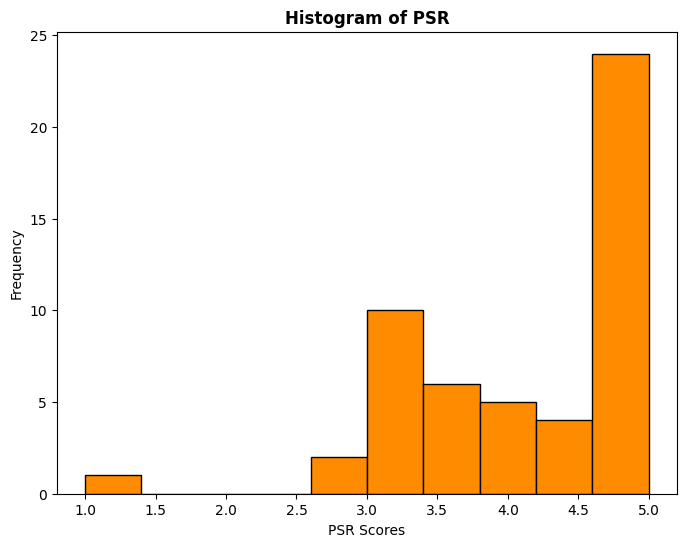

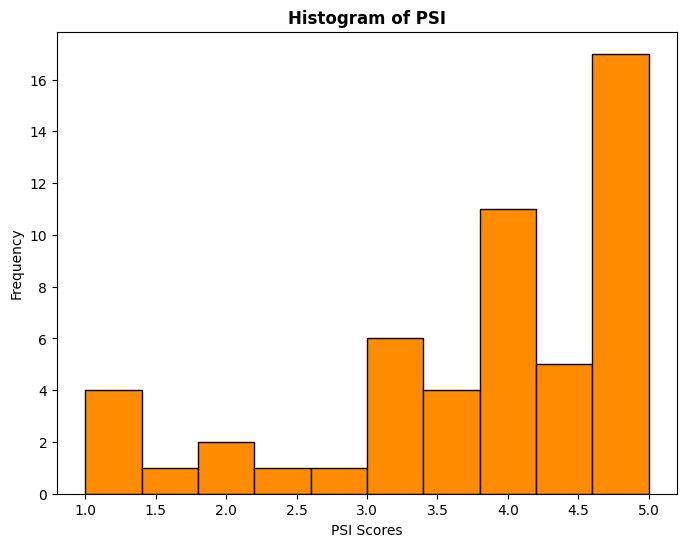

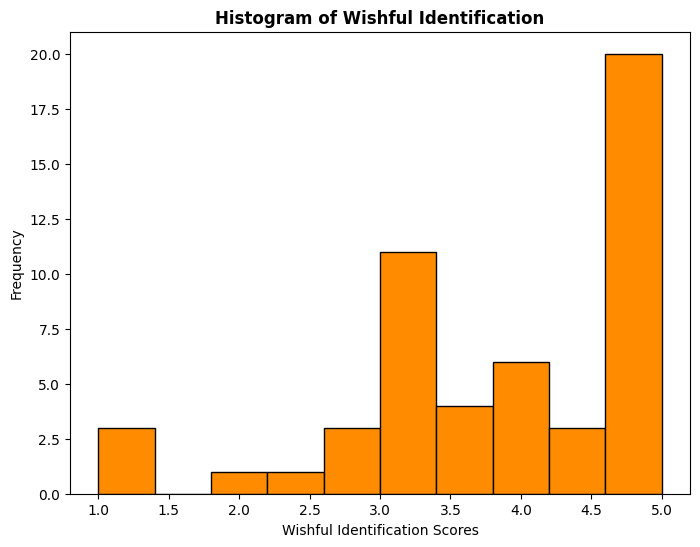

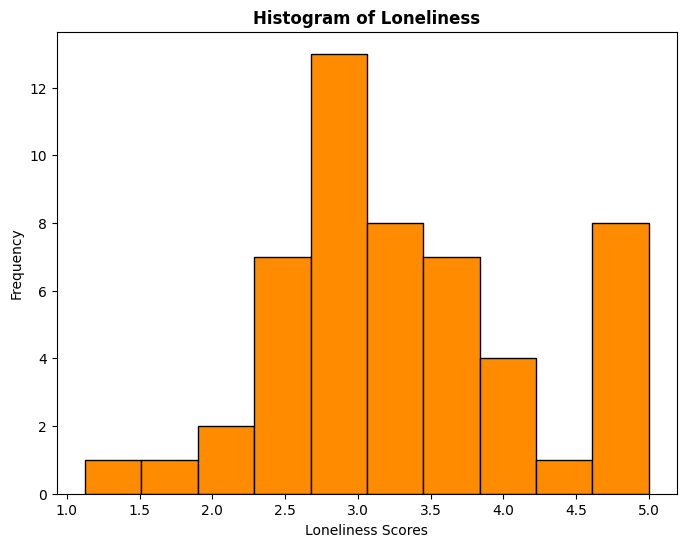

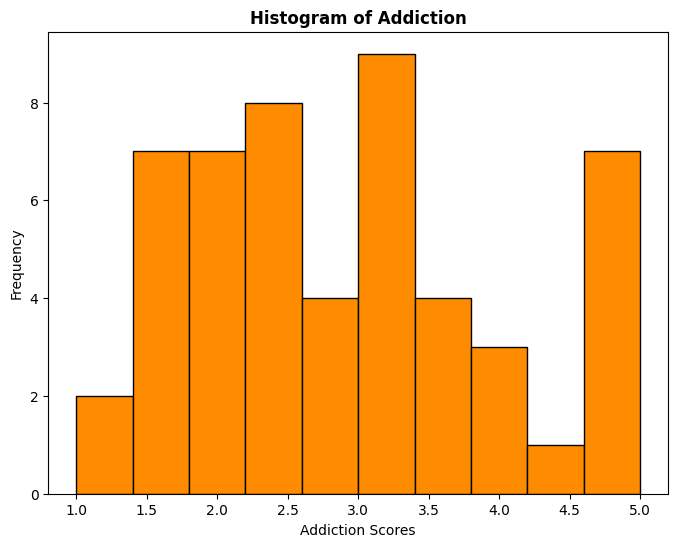

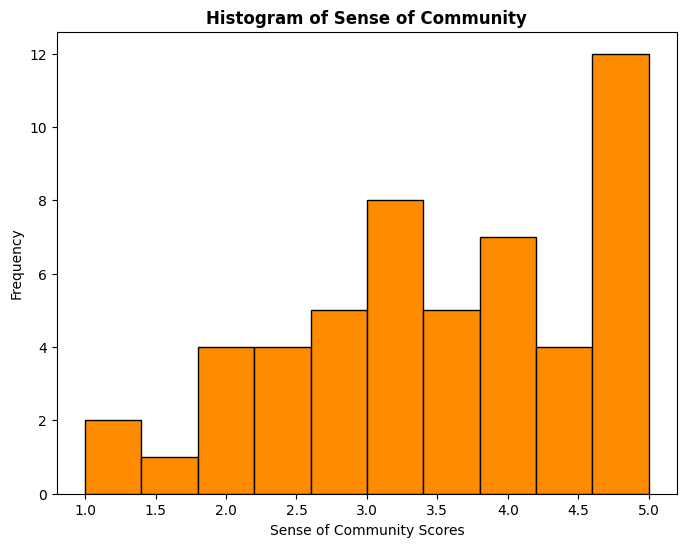

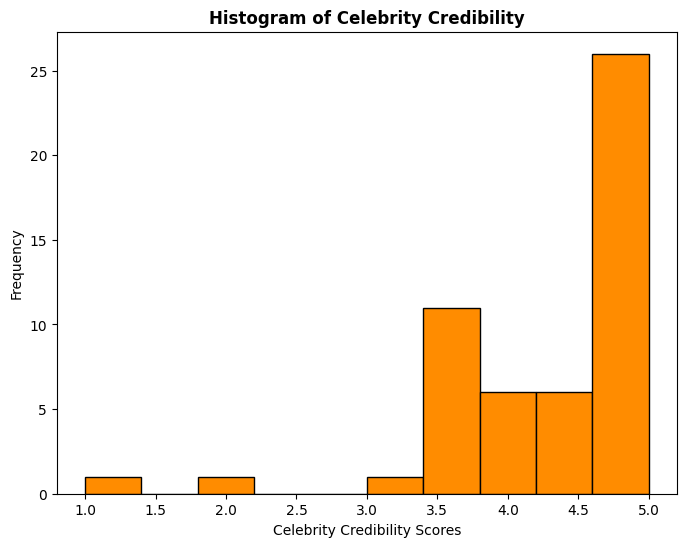

In [36]:
# Creating histograms to visualize the skewness values obtained: 

# Hypothesis 1: PSR
plt.figure(figsize=(8, 6))
plt.hist(df_cleaned['PSR'], bins=10, edgecolor='black', color='darkorange')
plt.title('Histogram of PSR', weight='bold')
plt.xlabel('PSR Scores')
plt.ylabel('Frequency')
plt.savefig('Skewness PSR.png', dpi=600, bbox_inches='tight')
plt.show()

# Hypothesis 2: PSI
plt.figure(figsize=(8, 6))
plt.hist(df_cleaned['PSI'], bins=10, edgecolor='black', color='darkorange')
plt.title('Histogram of PSI', weight='bold')
plt.xlabel('PSI Scores')
plt.ylabel('Frequency')
plt.savefig('Skewness PSI.png', dpi=600, bbox_inches='tight')
plt.show()

# Hypothesis 3: Wishful Identification
plt.figure(figsize=(8, 6))
plt.hist(df_cleaned['Wishful Identification'], bins=10, edgecolor='black', color='darkorange')
plt.title('Histogram of Wishful Identification', weight='bold')
plt.xlabel('Wishful Identification Scores')
plt.ylabel('Frequency')
plt.savefig('Skewness Wishful Identification.png', dpi=600, bbox_inches='tight')
plt.show()

# Hypothesis 4: Loneliness
plt.figure(figsize=(8, 6))
plt.hist(df_cleaned['Loneliness'], bins=10, edgecolor='black', color='darkorange')
plt.title('Histogram of Loneliness', weight='bold')
plt.xlabel('Loneliness Scores')
plt.ylabel('Frequency')
plt.savefig('Skewness Loneliness.png', dpi=600, bbox_inches='tight')
plt.show()

# Hypothesis 5: Live Stream Addiction
plt.figure(figsize=(8, 6))
plt.hist(df_cleaned['Addiction'], bins=10, edgecolor='black', color='darkorange')
plt.title('Histogram of Addiction', weight='bold')
plt.xlabel('Addiction Scores')
plt.ylabel('Frequency')
plt.savefig('Skewness Addiction.png', dpi=600, bbox_inches='tight')
plt.show()

# Hypothesis 6: Sense of Community
plt.figure(figsize=(8, 6))
plt.hist(df_cleaned['Sense of Community'], bins=10, edgecolor='black', color='darkorange')
plt.title('Histogram of Sense of Community', weight='bold')
plt.xlabel('Sense of Community Scores')
plt.ylabel('Frequency')
plt.savefig('Skewness Sense of Community.png', dpi=600, bbox_inches='tight')

# Hypothesis 7: Celebrity Credibility
plt.figure(figsize=(8, 6))
plt.hist(df_cleaned['Celebrity Credibility'], bins=10, edgecolor='black', color='darkorange')
plt.title('Histogram of Celebrity Credibility', weight='bold')
plt.xlabel('Celebrity Credibility Scores')
plt.ylabel('Frequency')
plt.savefig('Skewness Celebrity Credibility.png', dpi=600, bbox_inches='tight')

# Skewness Interpretation

- Skewness essentially measures the asymmetry of a distribution. A distribution can be negatively skewed to the left, positively skewed to the right, or have zero skewness (symmetrical data).
- Skewness is also typically interpreted according to its magnitude. A skew between -0.5 and 0.5 indicates symmetrical data, a skew between -1 to -0.5 and 0.5 to 1 indicates a moderate skew, and a skew less than -1 or greater than 1 indicates highly skewed data.
- Having said that, most of the hypotheses, namely Loneliness, Addiction, and Sense of Community, are fairly symmetrical. As evidenced by the histograms, these hypotheses have a roughly even distribution of scores, with a slight tendency towards either positive or negative values. This is in line with previous observations that note that these three hypotheses were found to be more 'controversial' by respondents, as responses to the items of the three scales tended to be more mixed than other scales, demonstrating a lack of a general consensus towards the statements.
- Interestingly, the skewness of the other hypotheses range from a moderate to high left skew. This is evident in the histogram, as the responses for all these four scales tended to mostly be positive to highly positive, with some spread out, but significantly less, negative responses. This is also in line with previous analyses and findings, as it shows that respondents tended to harbor strongly positive perceptions towards the statements found within the PSR, PSI, Wishful Identification, and Celebrity Credibility scales.
- None of the hypotheses in the survey were found to have a moderate to high right skew (indicating mostly negative responses).

In [37]:
# Performing One-Sample Wilcoxon Signed-Rank Test for each hypothesis: 

# Hypothesis 1: PSR
null_value = 4
stat_1, p_value_1 = wilcoxon(df_cleaned['PSR'] - null_value)
print(f'Wilcoxon signed-rank test for PSR: W-statistic = {stat_1}, p-value = {p_value_1}')
                             
# Hypothesis 2: PSI
stat_2, p_value_2 = wilcoxon(df_cleaned['PSI'] - null_value)
print(f'Wilcoxon signed-rank test for PSI: W-statistic = {stat_2}, p-value = {p_value_2}')

# # Hypothesis 3: Wishful Identification
stat_3, p_value_3 = wilcoxon(df_cleaned['Wishful Identification'] - null_value)
print(f'Wilcoxon signed-rank test for Wishful Identification: W-statistic = {stat_3}, p-value = {p_value_3}')

# Hypothesis 4: Loneliness
null_value = 3
stat_4, p_value_4 = wilcoxon(df_cleaned['Loneliness'] - null_value)
print(f'Wilcoxon signed-rank test for Loneliness: W-statistic = {stat_4}, p-value = {p_value_4}')

# Hypothesis 5: Addiction
stat_5, p_value_5 = wilcoxon(df_cleaned['Addiction'] - null_value)
print(f'Wilcoxon signed-rank test for Addiction: W-statistic = {stat_5}, p-value = {p_value_5}')

# Hypothesis 5: Sense of Community
null_value = 4
stat_6, p_value_6 = wilcoxon(df_cleaned['Sense of Community'] - null_value)
print(f'Wilcoxon signed-rank test for Sense of Community: W-statistic = {stat_6}, p-value = {p_value_6}')

# # Hypothesis 6: Celebrity Credibility
stat_7, p_value_7 = wilcoxon(df_cleaned['Celebrity Credibility'] - null_value)
print(f'Wilcoxon signed-rank test for Celebrity Credibility: W-statistic = {stat_7}, p-value = {p_value_7}')

Wilcoxon signed-rank test for PSR: W-statistic = 406.5, p-value = 0.03822263236406782
Wilcoxon signed-rank test for PSI: W-statistic = 599.5, p-value = 0.8964492334305906
Wilcoxon signed-rank test for Wishful Identification: W-statistic = 488.5, p-value = 0.5646193098190363
Wilcoxon signed-rank test for Loneliness: W-statistic = 338.0, p-value = 0.026517102791832763
Wilcoxon signed-rank test for Addiction: W-statistic = 529.0, p-value = 0.40562749088035077
Wilcoxon signed-rank test for Sense of Community: W-statistic = 378.5, p-value = 0.007594901756598192
Wilcoxon signed-rank test for Celebrity Credibility: W-statistic = 251.5, p-value = 0.00017764446973053097


In [ ]:
df_cleaned.head()